In [1]:
import numpy as np
import pandas as pd
import xgboost
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Create dummy dataframe

In [2]:
np.random.seed(42)
f = pd.DataFrame(np.random.random((10,8)))
label = [random.randint(0,1) for _ in range(10)]

In [3]:
param = {}
param['max_depth'] = 10
param['n_estimators'] = 20
param['objective'] = 'reg:linear'
param['silent']=True

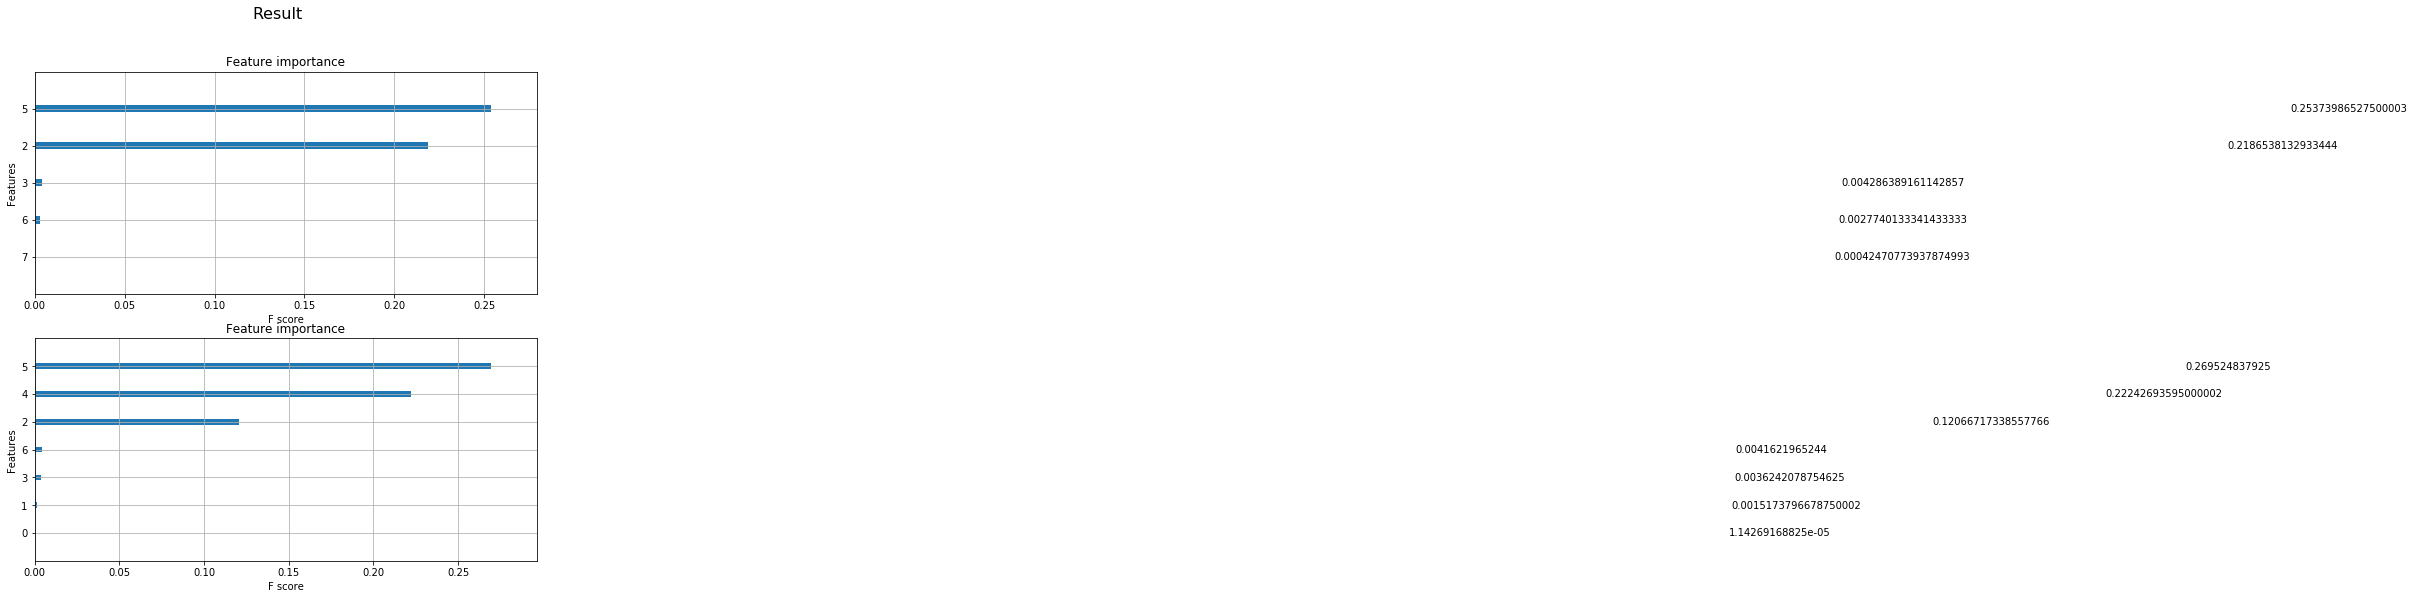

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(9,9))
fig.suptitle(f"Result", fontsize=16)

dtrain = xgboost.DMatrix(f.iloc[:,[7,6,5,4,3,2,1,0]],label)
bst = xgboost.train(param,dtrain,param['n_estimators'],verbose_eval=False)
xgboost.plot_importance(bst,importance_type='gain',ax=axes[0])

dtrain = xgboost.DMatrix(f.iloc[:,[0,1,2,3,4,5,6,7]],label)
bst = xgboost.train(param,dtrain,param['n_estimators'],verbose_eval=False)
xgboost.plot_importance(bst,importance_type='gain',ax=axes[1])
